## Name:- Pawar Akash Babu

# Prediction Using UnSupervised Machine Learning.

## TASK 2 : ***Predict the Optimum number of clusters and***                  
   ## ***Represent it visually***

### Here we will use K-Means Clustering Technique.

In [24]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# Loading iris dataset
iris = datasets.load_iris()
irisdata = pd.DataFrame(iris.data,columns = iris.feature_names)
irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
irisdata.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [3]:
irisdata.shape

(150, 4)

In [4]:
irisdata.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
irisdata.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
irisdata.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


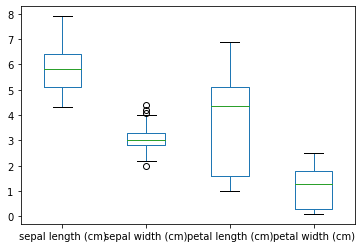

In [18]:
irisdata[['sepal length (cm)','sepal width (cm)',
          'petal length (cm)','petal width (cm)']].plot.box()

### Predicting the value of k for the model:

In [28]:
# finding the optimum number of clusters for k-means Classification

k_range = range(1,11)
sse = []              # sum of squares of error(SSE)

for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(irisdata)
    sum_of_squares = km.inertia_
    sse.append(sum_of_squares)
print('Sum of Squares from k = 1 to k = 10 are as follows:')
sse

Sum of Squares from k = 1 to k = 10 are as follows:


[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.255523809523815,
 46.44618205128205,
 39.066035353535355,
 34.299712121212124,
 30.01588095238096,
 27.78757487344845,
 26.144206634009265]

As we can see in the second box plot i.e Sepal width. few outliers are present there.

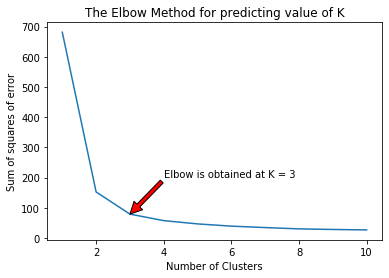

In [30]:
# Finding the optimum number of clusters for k-means classification
x = irisdata.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
                   max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, it allow us to observe elbow.
plt.plot(k_range, sse)
plt.title('The Elbow Method for predicting value of K')
plt.annotate("Elbow is obtained at K = 3",xytext = (4,200),xy=(3,78.8514),arrowprops={'facecolor':'red'})
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squares of error')
plt.show()

Here we can see that the graph is looking like elbow, that is why we call it as 'The Elbow Method'. Now to find the cluster we just focus on where the elbow is occuring, because at that point within cluster sum of square does not decrease significantly with every iteration.

From this we will choose the number of clusters as "3".


In [33]:
# Applying k-means to the dataset, Creating the K-means classifier.

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
               max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

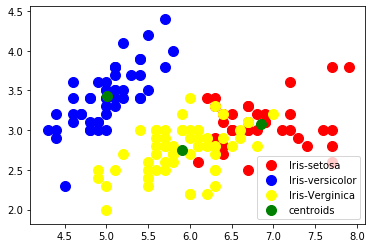

In [32]:
# Visualizing the Clusters.
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s=100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s=100, c='blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],
           s = 100, c = 'yellow', label = 'Iris-Verginica')

# Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'green', label = 'centroids')
plt.legend()


## Conclusion : The Optimum number of Cluster is 3, and it is represented visually above.

### Thank You, The Sparks Foundation.